<a href="https://colab.research.google.com/github/Mohammed-Fayaz-Ahamed/DataScience_assignment/blob/main/MLR_assiginment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilinear regression assiginment-1
50_Startups

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.
R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit -- profit of each state in the past few years¶

In [1]:
#Import the data
import pandas as pd

In [2]:
dm = pd.read_csv("/content/50_Startups.csv")
dm

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
#check for missing values
dm.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
#Encoding

mappings = {}
for i in dict(dm.dtypes):
 if dict(dm.dtypes)[i] == 'O':
  mappings[i] = dict(zip(dm[i].unique(), range(len(dm[i].unique()))))
  dm[i] = dm[i].map(lambda x: mappings[i][x])
dm

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [5]:
# Standardization Y variable
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
dm["Profit"] =pd.DataFrame(MM.fit_transform(dm[["Profit"]]))
dm["Profit"]

0     1.000000
1     0.997355
2     0.993178
3     0.947292
4     0.853171
5     0.801382
6     0.796490
7     0.794407
8     0.774468
9     0.760661
10    0.740175
11    0.729686
12    0.714629
13    0.673644
14    0.664044
15    0.648921
16    0.632454
17    0.623317
18    0.617103
19    0.608713
20    0.584482
21    0.544157
22    0.538747
23    0.529634
24    0.528609
25    0.522146
26    0.512737
27    0.508654
28    0.498934
29    0.486108
30    0.480099
31    0.466280
32    0.465966
33    0.462312
34    0.461939
35    0.460626
36    0.428126
37    0.423852
38    0.374747
39    0.373489
40    0.357914
41    0.355430
42    0.319951
43    0.310156
44    0.284485
45    0.282940
46    0.196020
47    0.156990
48    0.118211
49    0.000000
Name: Profit, dtype: float64

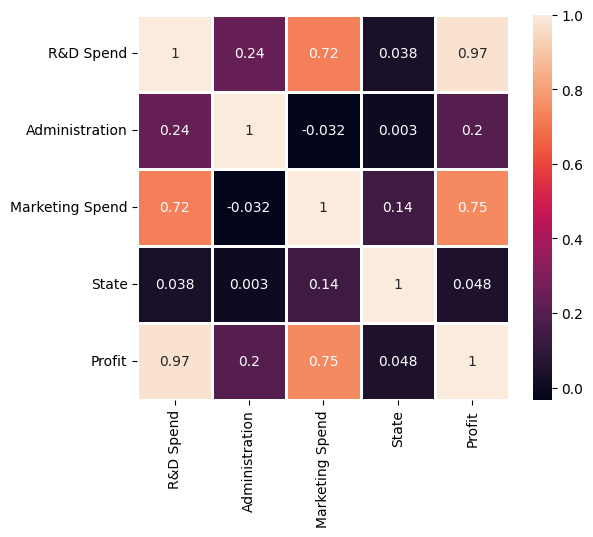

In [9]:
#Feature selection

import matplotlib.pyplot as plt

import seaborn as sns
plt.figure(figsize = (6,5))
corr = dm.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

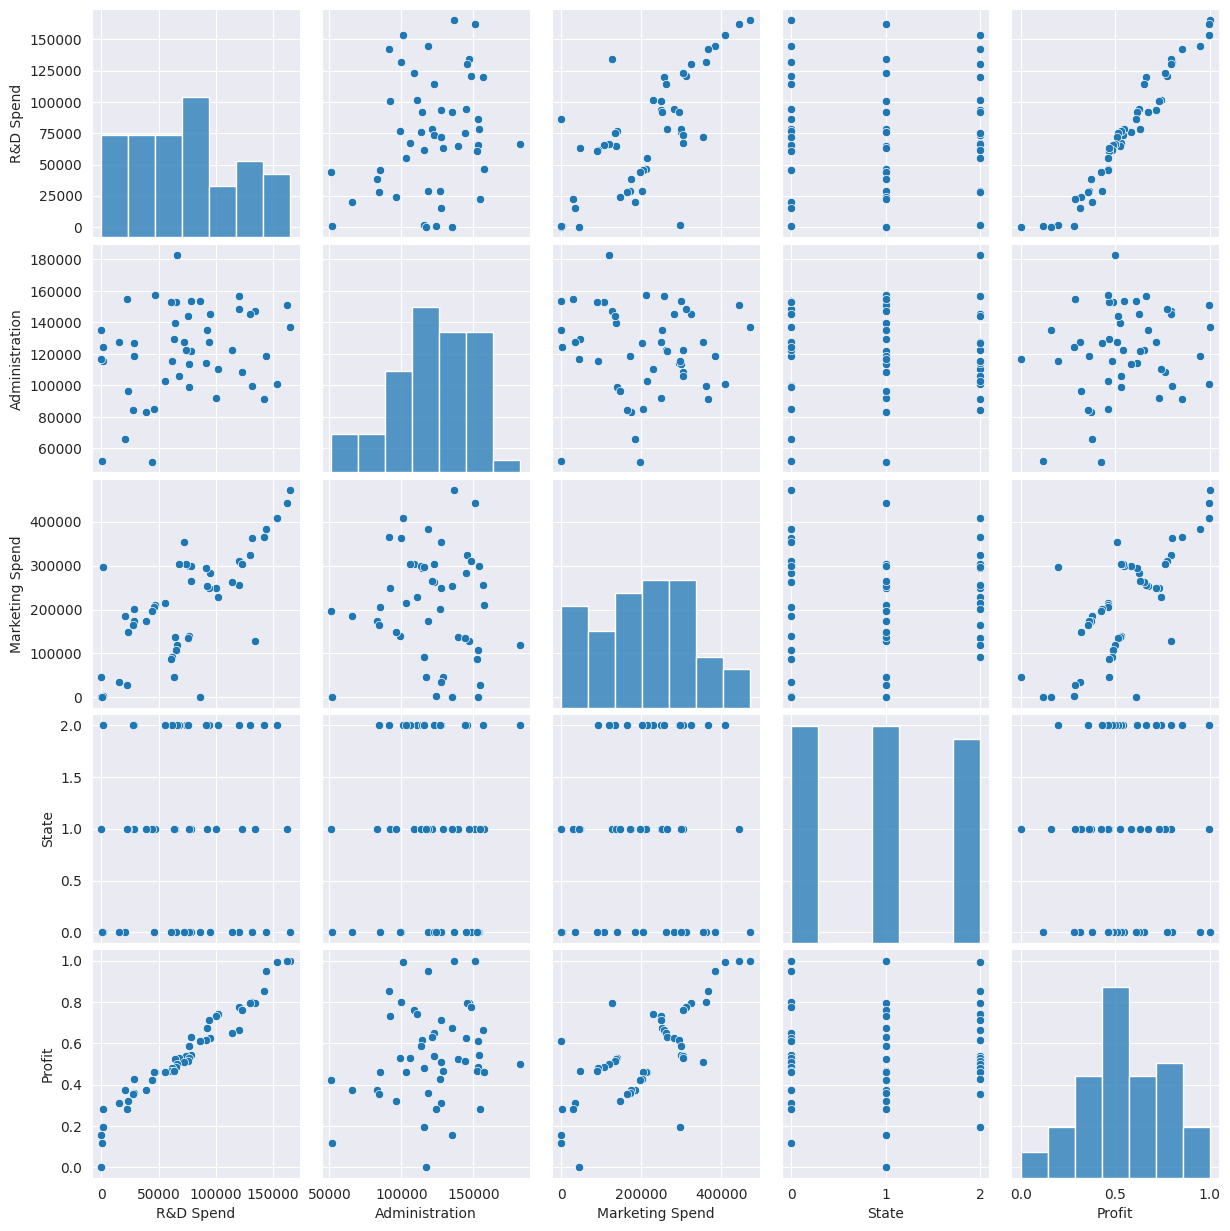

In [10]:
#EDA
# Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(dm)


In [11]:
'''## Step-3 Split the variables as X and Y

X = dm[["R&D Spend"]]                                                  #== Case-1

Y = dm["Profit"]

In [12]:
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [13]:
# Model predicted values
Y_pred = LR.predict(X)
Y_pred

array([0.98889215, 0.97565543, 0.93160748, 0.8879785 , 0.87708186,
       0.82786598, 0.84104045, 0.82027095, 0.77333935, 0.78677264,
       0.68371816, 0.67774746, 0.64499501, 0.6359924 , 0.77045637,
       0.744384  , 0.56874187, 0.64881189, 0.63482229, 0.6091837 ,
       0.56027859, 0.57055244, 0.54940971, 0.51832264, 0.56407979,
       0.50452633, 0.55582872, 0.54033206, 0.5111979 , 0.50905212,
       0.49168058, 0.48755249, 0.49848478, 0.46040829, 0.41678517,
       0.41480291, 0.33133551, 0.40545052, 0.290761  , 0.37893647,
       0.33177122, 0.32762721, 0.30717203, 0.26803579, 0.30013302,
       0.19825375, 0.19977024, 0.19344192, 0.19604957, 0.19344192])

In [15]:
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.003
Root mean square error  0.052


In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

r2_score 0.947


In [19]:
'''X = dm[["R&D Spend","Marketing Spend"]]                              #== Case-2
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
# Model predicted values
Y_pred = LR.predict(X)
Y_pred
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.003
Root mean square error  0.05


In [20]:
r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

r2_score 0.95


In [25]:
X = dm[["R&D Spend","Marketing Spend","Administration"]]             #== Case-3
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
# Model predicted values
Y_pred = LR.predict(X)
Y_pred
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.002
Root mean square error  0.05


In [22]:
r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

r2_score 0.951


In [23]:
'''X = dm[["R&D Spend","Marketing Spend","Administration","State"]]     #== Case-4
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
# Model predicted values
Y_pred = LR.predict(X)
Y_pred
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))'''

Mean square error  0.002
Root mean square error  0.05


In [24]:
r2 = r2_score(Y,Y_pred)
print("r2_score",r2.round(3))

r2_score 0.951


In [ ]:
## R2 values with cases without model improvement
# Case-1      r2_score 0.947
# Case-2      r2_score 0.950
# Case-3      r2_score 0.951
# Case-4      r2_score 0.951

# Improving the model by by Data cleaning

In [26]:
## Built full model
import statsmodels.api as sm

model = sm.OLS(Y, X)  # Capitalize OLS
model = model.fit()

In [27]:
#Variance Inflation Factor (VIF) is a measure of multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

X1 = dm[["R&D Spend","Marketing Spend","Administration","State"]]
vif = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif

## R&D Spend and Marketing Spend are having moderate level of multicollinearity issuess


[8.563613888812206, 8.1201510466834, 4.893955804957631, 2.4647638730268473]

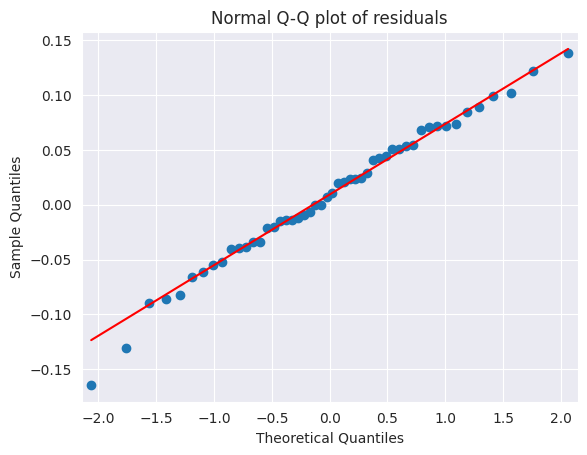

[array([], dtype=int64)]

In [28]:
# residual analysis by using Q-Q plot

import matplotlib.pyplot as plt

QQ_plot = sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

list(np.where(model.resid>10))             # No residuals found

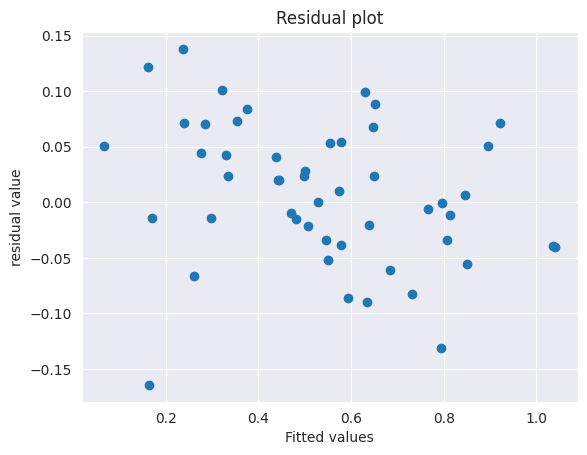

In [29]:
# Residual plot for homoscedasticity

model.fittedvalues
model.resid

plt.scatter(model.fittedvalues,model.resid)
plt.title("Residual plot")
plt.xlabel("Fitted values")
plt.ylabel("residual value")
plt.show()

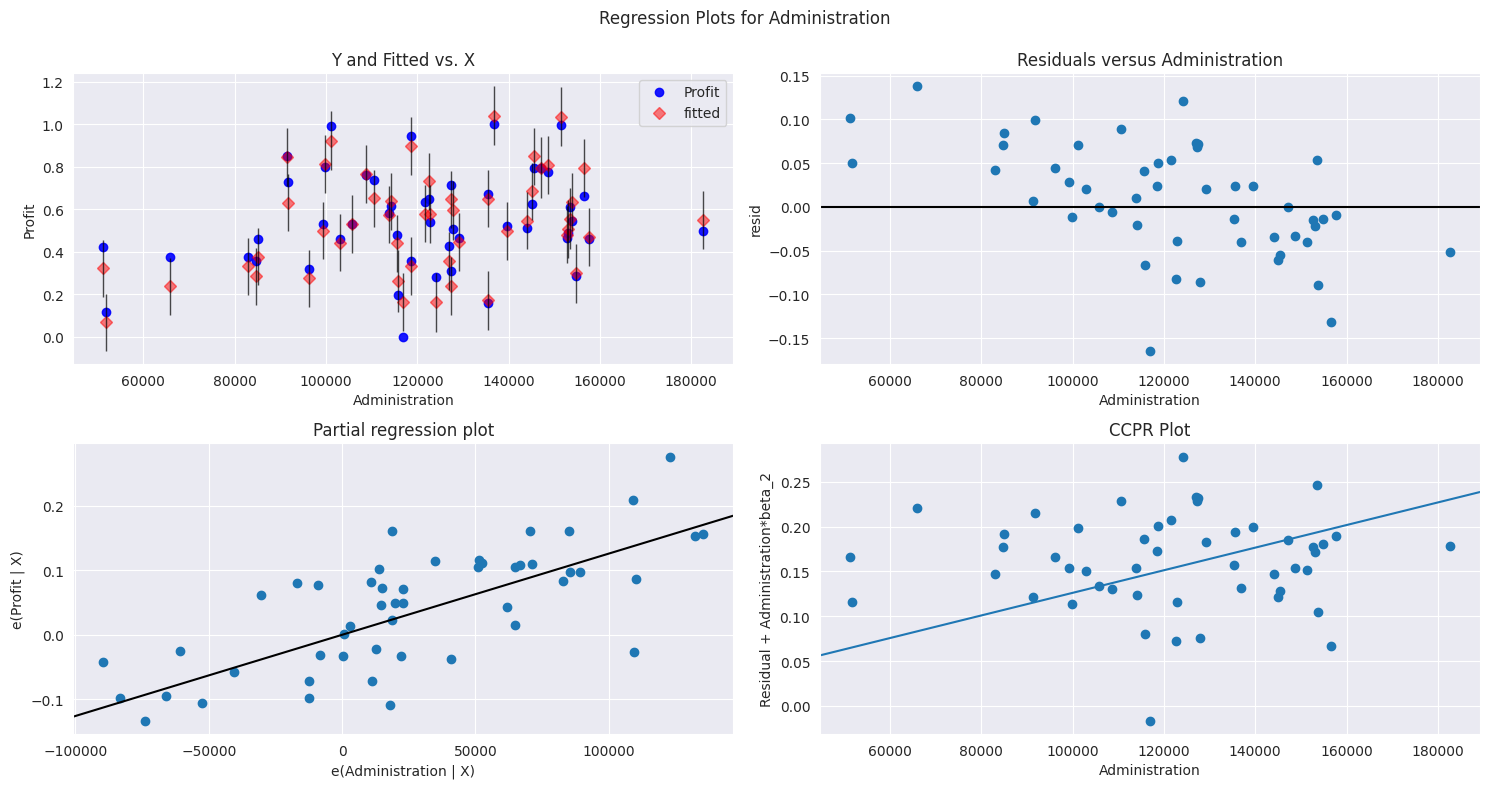

In [30]:
#Residual Vs Regressors
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

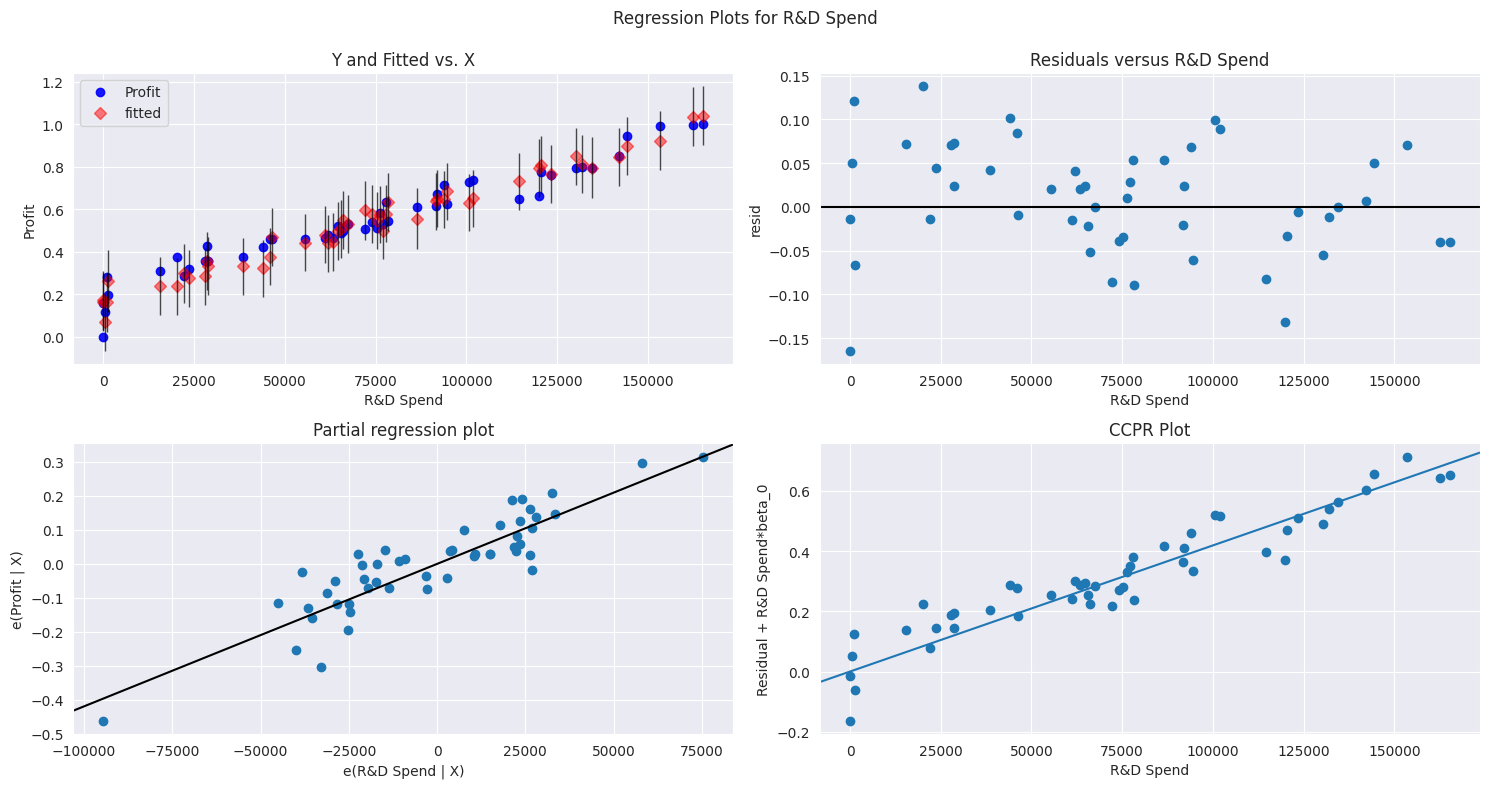

In [31]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"R&D Spend",fig=fig)
plt.show()

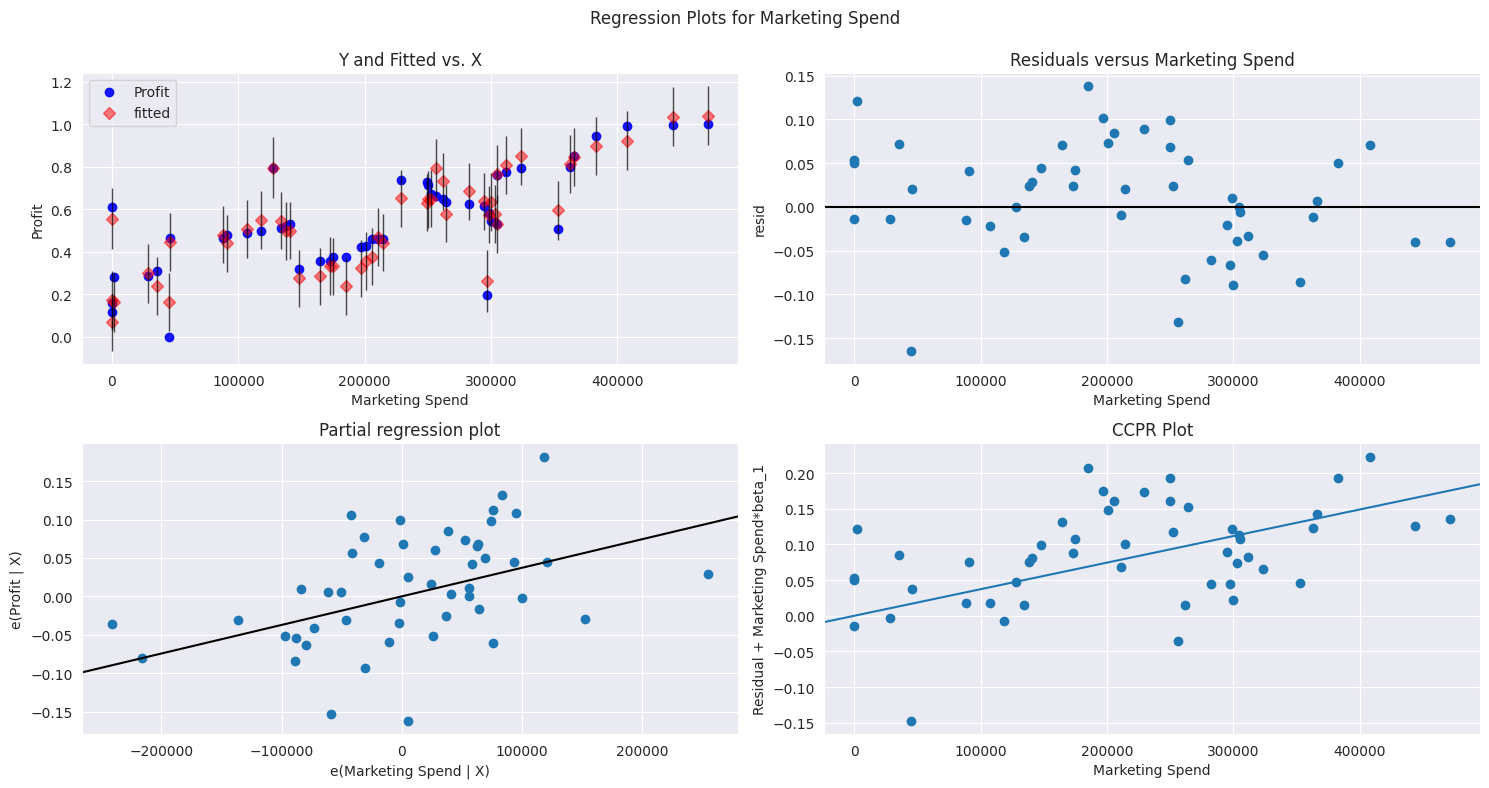

In [32]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Marketing Spend",fig=fig)
plt.show()

In [33]:
# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

model_influence = model.get_influence()
(cooks , P_value) = model_influence.cooks_distance
(cooks , P_value)

(array([1.67389164e-02, 1.24245218e-02, 5.11837947e-02, 1.72024182e-02,
        3.64191931e-04, 8.61000908e-04, 2.04023892e-06, 1.20943423e-02,
        3.69281874e-03, 1.70404503e-04, 2.02715662e-02, 2.62240298e-02,
        9.07580618e-03, 1.12953302e-03, 6.96428657e-02, 2.22916843e-02,
        6.30100844e-03, 9.06238877e-03, 1.07804092e-03, 5.86951641e-02,
        3.64546212e-04, 3.21251950e-02, 5.72706637e-03, 4.80988228e-08,
        1.69567412e-03, 1.70056381e-03, 4.40438724e-03, 5.43330057e-02,
        2.01821159e-02, 2.26901011e-03, 4.94448870e-03, 1.27121561e-03,
        2.65301804e-03, 7.46306418e-04, 5.22947285e-04, 1.40281210e-02,
        3.15113230e-02, 1.91102404e-02, 7.31739667e-02, 2.89158041e-03,
        2.32922503e-03, 1.17392286e-02, 5.57225944e-03, 2.80244020e-02,
        1.76483905e-03, 1.05712956e-01, 1.30924634e-01, 1.69419350e-03,
        2.79444441e-03, 1.60627147e-01]),
 array([0.99700789, 0.9980787 , 0.98451633, 0.99688413, 0.99999025,
        0.99996456, 1.    

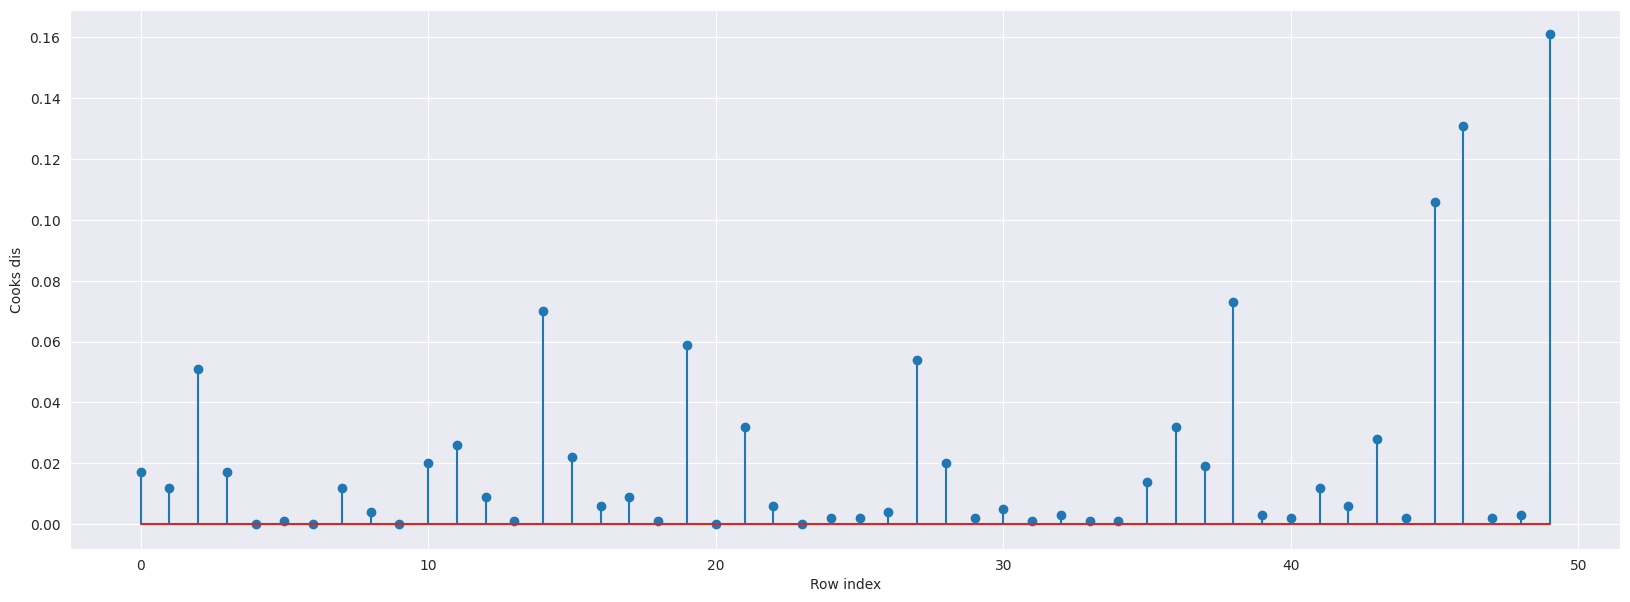

In [35]:
# Plot the influence values using the stemplot

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dm)),np.round(cooks,3))
plt.xlabel("Row index")
plt.ylabel("Cooks dis")
plt.show()

In [36]:
#index and value of influencer where c is more than 0.5
(np.argmax(cooks),np.max(cooks))

(49, 0.1606271473939891)

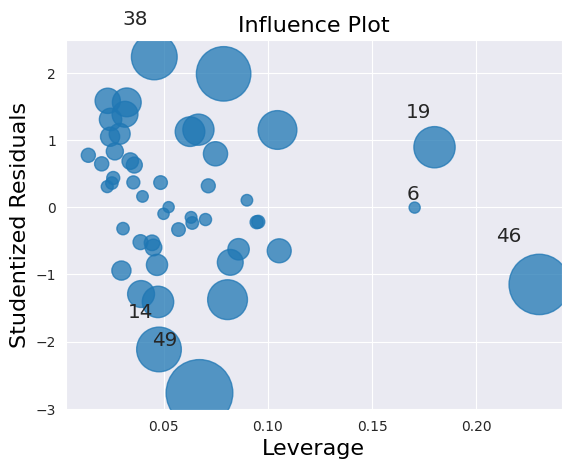

In [37]:
# High Influence points

from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()     # from the plot 38,46 and 49(from cooks distance) are the highly influencers


# Improving the Model

In [49]:
# Removing influencer points
dm[dm.index.isin([38,46,49])]


,R&D Spend,Administration,Marketing Spend,State,Profit
38,20229.59,65947.93,185265.10,0,0.374747
46,1315.46,115816.21,297114.46,2,0.196020
49,0.00,116983.80,45173.06,1,0.000000


In [50]:
dm_new = dm

In [51]:
dm_new = dm_new.drop(["Marketing Spend"],axis=1)
dm_new                   # R&D Spend and Marketing Spend are having moderate level of multicollinearity issues

,R&D Spend,Administration,State,Profit
0,165349.20,136897.80,0,1.000000
1,162597.70,151377.59,1,0.997355
2,153441.51,101145.55,2,0.993178
3,144372.41,118671.85,0,0.947292
4,142107.34,91391.77,2,0.853171
5,131876.90,99814.71,0,0.801382
6,134615.46,147198.87,1,0.796490
7,130298.13,145530.06,2,0.794407
8,120542.52,148718.95,0,0.774468
9,123334.88,108679.17,1,0.760661


In [52]:
dm_new = dm_new.drop(dm_new.index[[38,46,49]],axis=0).reset_index()
dm_new                   # High influence points

,index,R&D Spend,Administration,State,Profit
0,0,165349.20,136897.80,0,1.000000
1,1,162597.70,151377.59,1,0.997355
2,2,153441.51,101145.55,2,0.993178
3,3,144372.41,118671.85,0,0.947292
4,4,142107.34,91391.77,2,0.853171
5,5,131876.90,99814.71,0,0.801382
6,6,134615.46,147198.87,1,0.796490
7,7,130298.13,145530.06,2,0.794407
8,8,120542.52,148718.95,0,0.774468
9,9,123334.88,108679.17,1,0.760661


In [54]:
X = dm_new[["R&D Spend","Administration"]]             #============== Case-3
Y = dm_new["Profit"]

In [55]:
## Built full model
import statsmodels.api as sm

model2 = sm.OLS(Y, X)  # Capitalize OLS
model2 = model2.fit()

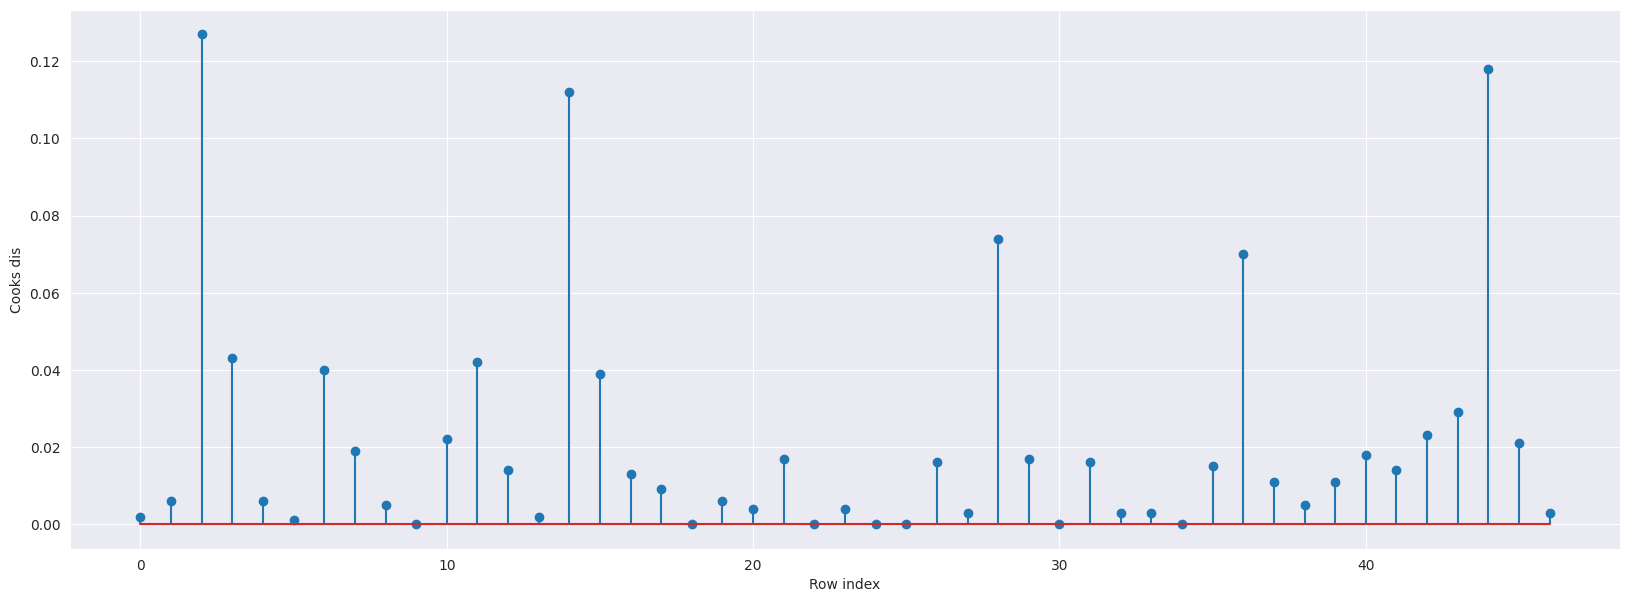

In [56]:
# Cook’s Distance

model_influence = model2.get_influence()
(cooks2 , P_value) = model_influence.cooks_distance
(cooks2 , P_value)

# Plot the influence values using the stemplot

fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(dm_new)),np.round(cooks2,3))
plt.xlabel("Row index")
plt.ylabel("Cooks dis")
plt.show()

In [57]:
#index and value of influencer where c is more than 0.5
(np.argmax(cooks2),np.max(cooks2))

(2, 0.1273741437727375)

In [59]:
dm_new2 = dm_new.drop(dm_new.index[[2]],axis=0).reset_index()
dm_new2                   # High influence points

,level_0,index,R&D Spend,Administration,State,Profit
0,0,0,165349.20,136897.80,0,1.000000
1,1,1,162597.70,151377.59,1,0.997355
2,3,3,144372.41,118671.85,0,0.947292
3,4,4,142107.34,91391.77,2,0.853171
4,5,5,131876.90,99814.71,0,0.801382
5,6,6,134615.46,147198.87,1,0.796490
6,7,7,130298.13,145530.06,2,0.794407
7,8,8,120542.52,148718.95,0,0.774468
8,9,9,123334.88,108679.17,1,0.760661
9,10,10,101913.08,110594.11,2,0.740175


In [60]:
dm_new2 =dm_new2.drop(["index"],axis=1)    #Drop newly created index column
dm_new2

,level_0,R&D Spend,Administration,State,Profit
0,0,165349.20,136897.80,0,1.000000
1,1,162597.70,151377.59,1,0.997355
2,3,144372.41,118671.85,0,0.947292
3,4,142107.34,91391.77,2,0.853171
4,5,131876.90,99814.71,0,0.801382
5,6,134615.46,147198.87,1,0.796490
6,7,130298.13,145530.06,2,0.794407
7,8,120542.52,148718.95,0,0.774468
8,9,123334.88,108679.17,1,0.760661
9,10,101913.08,110594.11,2,0.740175


# Predict new improved model

In [61]:
## Step-3 Split the variables as X and Y
x = dm_new2[["R&D Spend","Administration"]]             #============== Case-3   <<<Good>>>>
y = dm_new2["Profit"]

In [62]:
# Model fitting

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x,y)

LinearRegression()

In [63]:
# Model predicted values
y_pred = LR.predict(x)
y_pred

array([0.97386517, 0.95952679, 0.87836807, 0.87077522, 0.82234146,
       0.82997459, 0.81009621, 0.76443066, 0.78170441, 0.68197642,
       0.67823016, 0.64278385, 0.63321172, 0.7608056 , 0.73927152,
       0.56975901, 0.64456251, 0.63437173, 0.60538637, 0.56241616,
       0.56805133, 0.55096215, 0.52277005, 0.56765382, 0.50581575,
       0.55486748, 0.54164977, 0.50762986, 0.50873857, 0.49597878,
       0.4880113 , 0.50109125, 0.46713004, 0.41913332, 0.42502234,
       0.33990339, 0.4196173 , 0.39060707, 0.34123829, 0.34087074,
       0.31988367, 0.27873824, 0.3067896 , 0.21169486, 0.20583696,
       0.21734416])

In [64]:
# Model evaluation

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y,y_pred)
print("Mean square error ",mse.round(3))

import numpy as np
print("Root mean square error ", np.sqrt(mse).round(3))

Mean square error  0.002
Root mean square error  0.043


In [65]:
from sklearn.metrics import r2_score
r2 = r2_score(y,y_pred)
print("r2_score",r2.round(3))

r2_score 0.955
